In [211]:
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import random  # type: ignore

In [212]:
NUM_ITERATIONS = 10
NUM_PARTICLES = 10
EARLY_STOPPING_PATIENCE = 30

In [213]:
w = 0.5
c1 = 1
c2 = 2

In [214]:
def cost_function(position):
    return (position - 3) ** 2 + 4

In [215]:
def generate_particle():
    position = np.random.uniform(low=-100.0, high=100.0, size=1)
    position = position.item()

    return {
        "position": position,
        "score": cost_function(position),
        "velocity": random.random(),
        "pbest": position,
    }

In [217]:
def calculate_velocity(w, x, v, c1, c2, pbest, gbest):
    r1 = random.random()
    r2 = random.random()
    
    return w * v + c1 * r1 * (pbest - x) + c2 * r2 * (gbest - x)

In [218]:
def update_position(particles, w, c1, c2, gbest):
    if gbest is None:
        gbest = particles[0]["pbest"]

    for particle in particles:
        particle["velocity"] = calculate_velocity(
            w,
            particle["position"],
            particle["velocity"],
            c1,
            c2,
            particle["pbest"],
            gbest,
        )
        
        particle["position"] = particle["position"] + particle["velocity"]
        particle["score"] = cost_function(particle["position"])

        if particle["score"] < cost_function(particle["pbest"]):
            particle["pbest"] = particle["position"]

        if particle["score"] < cost_function(gbest):
            gbest = particle["position"]

    return gbest

In [219]:
def plot(particles):
    # Obtendo os valores de posição como NumPy array
    positions = [particle["position"] for particle in particles]

    # Criando o gráfico com uma linha horizontal e pontos em positions
    plt.figure(figsize=(22, 4))
    plt.plot(
        positions,
        [0] * len(positions),
        marker="o",
        color="b",
        linestyle="",
        label="Pontos",
    )  # Plotando pontos em positions, eixo y fixado em zero
    plt.xlabel("Valor de X")  # Nomeando o eixo x
    plt.ylabel("Valor de Y")  # Nomeando o eixo y
    plt.title("Gráfico de Linha Unidimensional com Pontos")
    plt.xlim(-100, 100)
    plt.legend()  # Mostrando a legenda
    plt.grid(True)  # Adicionando grade ao gráfico (opcional)
    plt.show()  # Exibindo o gráfico

In [220]:
particles = [generate_particle() for _ in range(NUM_PARTICLES)]

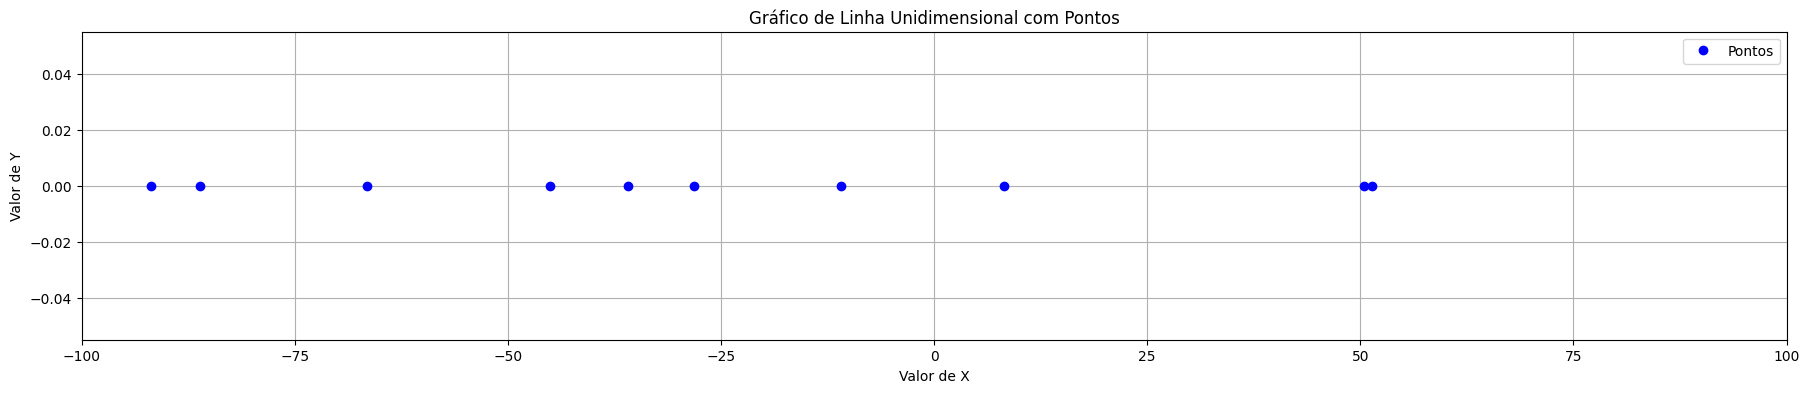

In [221]:
plot(particles)

In [222]:
i = 0
gbest = None
while True:
    print(f"Iteration {i+1}")

    gbest = update_position(particles, w, c1, c2, gbest)
    i += 1

    if i == NUM_ITERATIONS:
        break

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


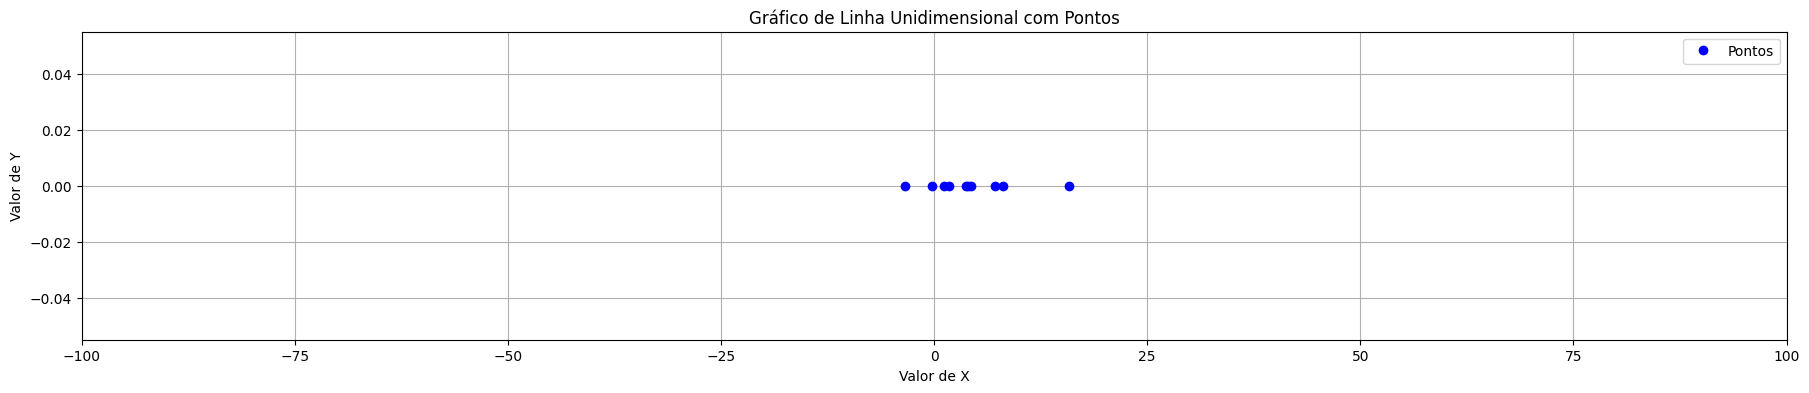

In [223]:
plot(particles)